In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-dataset/Student_performance_data _.csv


**importing useful libraries for data analysis**

In [3]:
import numpy as sp
import pandas as pd

**importing libraries for data visualisation**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline

**importing libraries necessary for machine learning algorithms**

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv

# Silence Warnings (optional)
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [6]:
df = pd.read_csv(os.path.join(dirname, filename))

taking a quick look at first 5 rows of the data set

In [7]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


**quick check on the unavailable data(NAs)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


confirmation: there is no missing data in the DataFrame

****Feature distribution ****

looking into how each features are distributed and gaining insights into the dataset

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

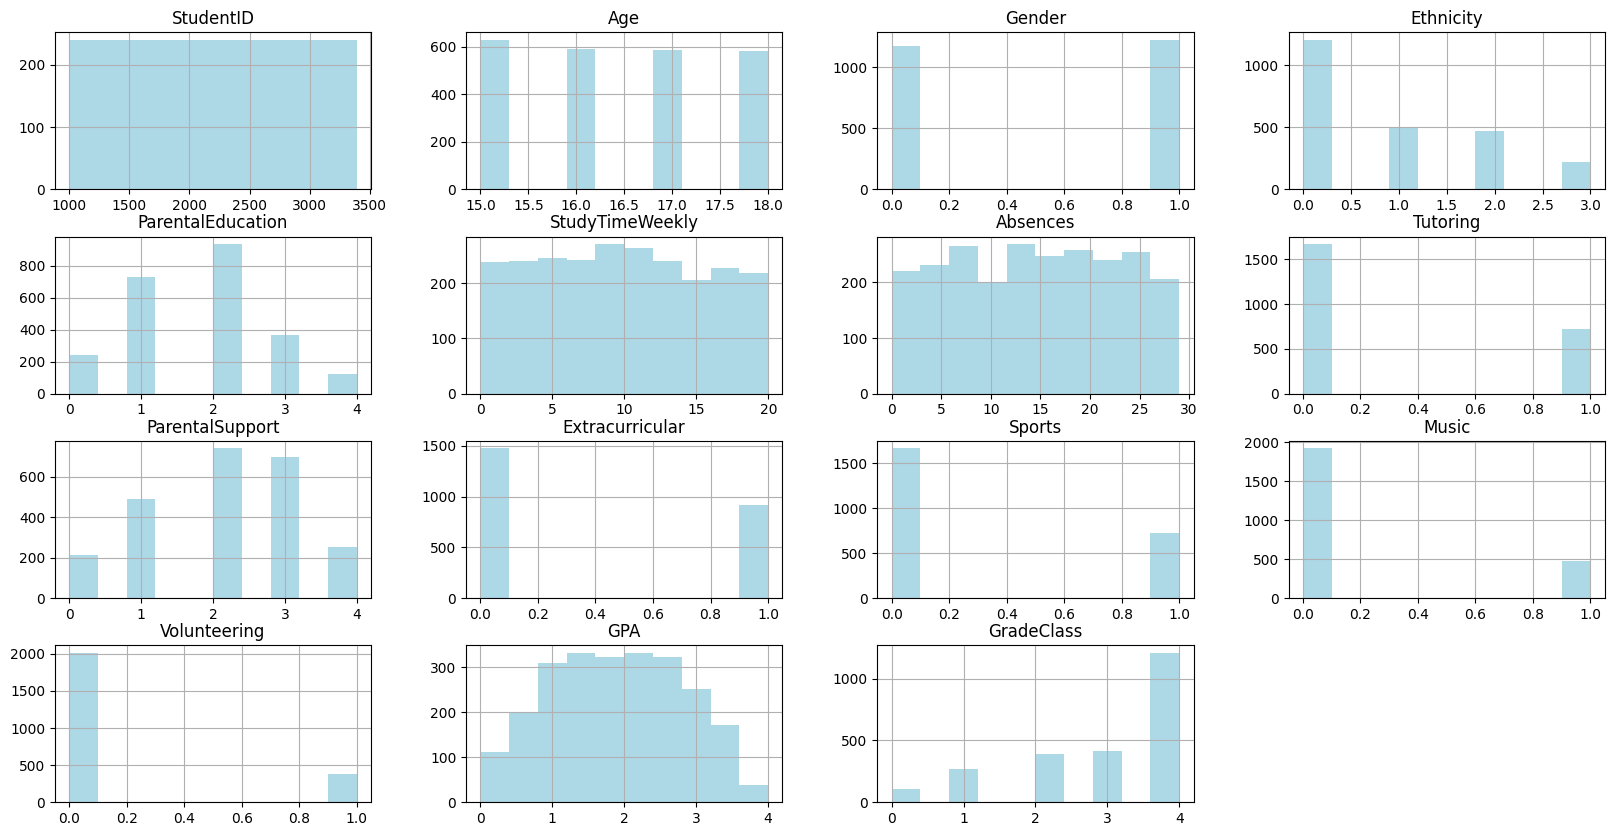

In [9]:
df.hist(figsize=(20,10),bins=10,color='lightblue')

***define categorical and numerical features***

- **encode categorical columns**: from object variables into numbers
-**scale the numerical features**: results in equal effect of small and large numbers

In [10]:
columns = list(df.columns)
numeric_columns = []
categorical_columns = []

**if unique element in a column is** 

**-greater than 5** ----> numeric_columns

**-lesser than 5** ------> categorical_columns



In [11]:
for i in columns:
    if (len(df[i].unique())>5):
        numeric_columns.append(i)
    else:
        categorical_columns.append(i)

In [12]:
# assuming the first column in the numeric_columns is non numeric we do:
numeric_columns = numeric_columns[1:]

In [13]:
print('numerical columns: ',numeric_columns)
print('categorical_columns: ',categorical_columns)

numerical columns:  ['StudyTimeWeekly', 'Absences', 'GPA']
categorical_columns:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


**convert the data type of the numeric_columns to float64(represents floating point numbers)---->**

In [14]:
df[numeric_columns]=df[numeric_columns].astype('float64')

**using labelencoder to encode the categorical columns to numeric type**

In [15]:
label_encoder = LabelEncoder()
df = df.copy()  # done to preserve the original data
for column in df[categorical_columns]:
    df[column]=label_encoder.fit_transform(df[column])

**standardising numerical features**

In [16]:
scaler = StandardScaler()
df[numeric_columns]=scaler.fit_transform(df[numeric_columns])

**Correlation Among Features**

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

**observation:**
**-Strongest Relationships:**

**Absences and GPA:**

Negative correlation (-0.92).

**More absences lead to lower GPA.**

**GPA and GradeClass:**

Negative correlation (-0.78).

**Higher GPA corresponds to lower GradeClass, indicating better academic performance.**


Split the data 
1) split the data into X(independent variables) and y(dependent,target feature)

2)split the X and Y dataframes into training and testing sets

In [ ]:
x=df.drop(columns=['GradeClass', 'GPA', 'StudentID', 'Age'])
y=df['GradeClass']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

**Feature Importance**
to determine which x variable is the most important to determine y

In [20]:
#using RandomForestClassifier to assess the relative importance of features to predicting y

In [21]:
clf =RandomForestClassifier(random_state=42)
clf = clf.fit(x,y)

fimp = pd.Series(data=clf.feature_importances_,index=x.columns).sort_values(ascending=False)

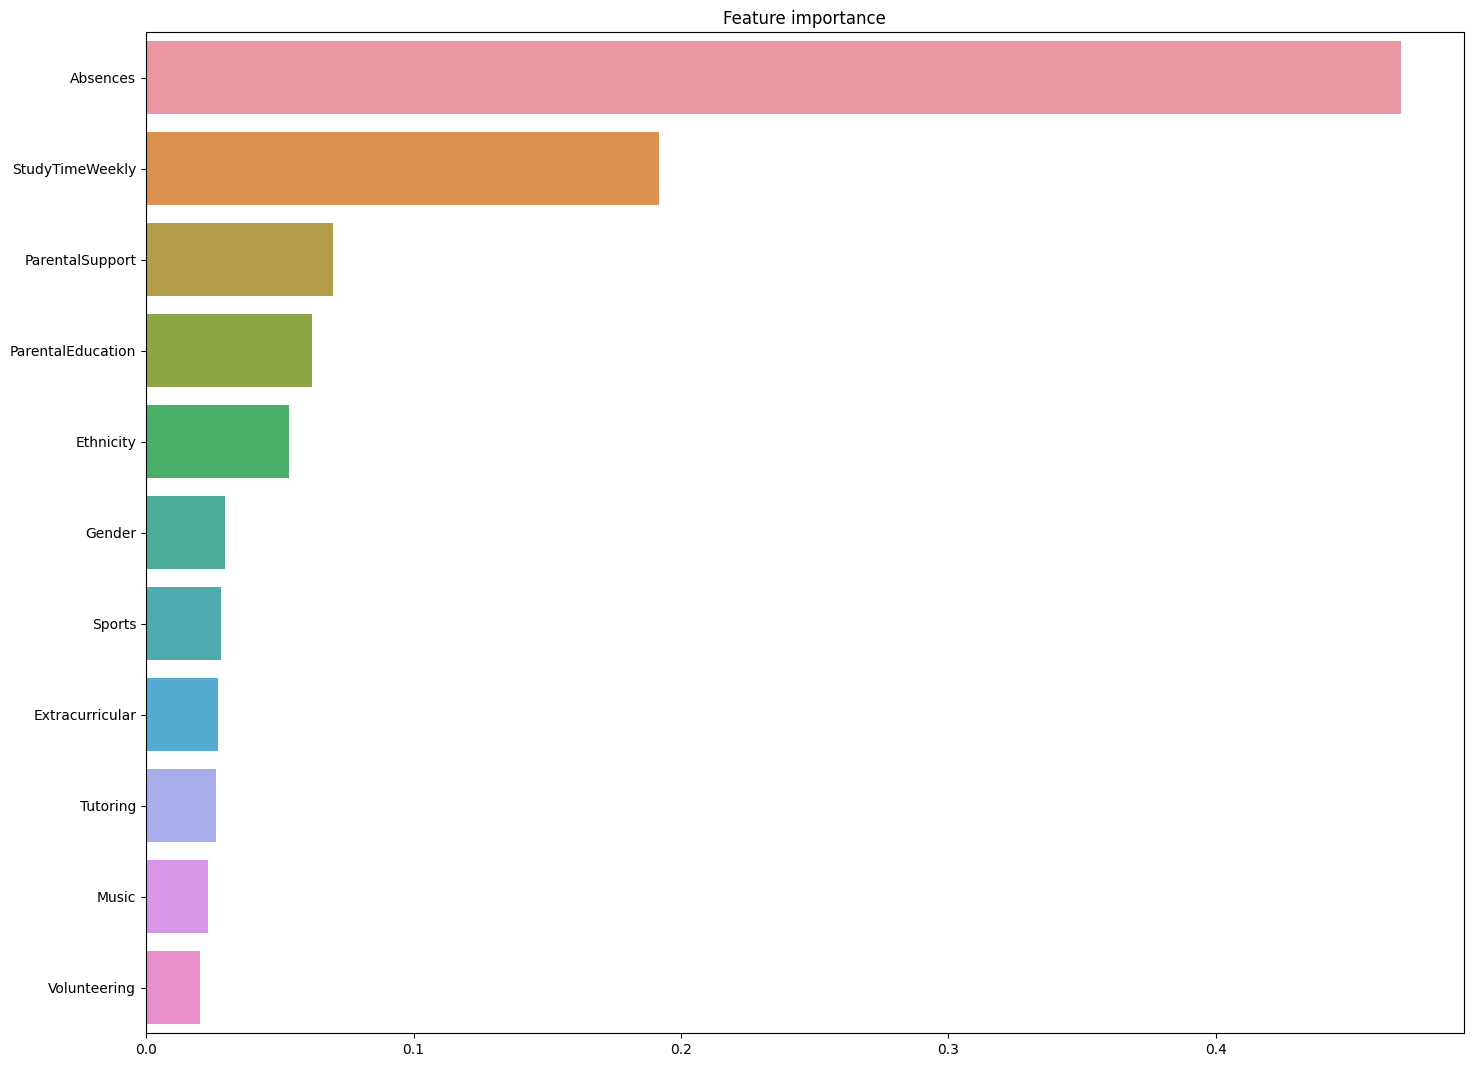

In [22]:
plt.figure(figsize=(17,13))
plt.title('Feature importance')
ax = sns.barplot(y=fimp.index,x=fimp.values,orient='h')

observation:
the most important predictor of grade is **Absencees**

**BUILDING A MODEL**

In [26]:
classification_models= {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'K-nearest Neighbours': KNeighborsClassifier(),
    'Support Vector Machines': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [27]:
model_names = []
accuracies = []

Linear Regression accuracy: 0.5723688769965598
Logistic Regression accuracy: 0.732776617954071
K-nearest Neighbours accuracy: 0.6450939457202505
Support Vector Machines accuracy: 0.7453027139874739
Decision Tree accuracy: 0.5741127348643006
Random Forest accuracy: 0.697286012526096


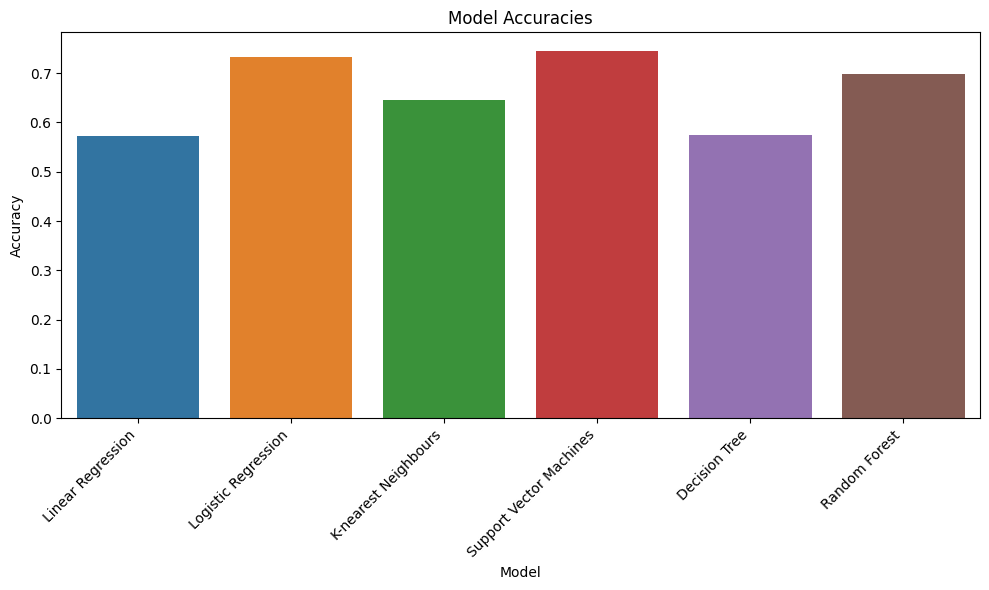

In [28]:
# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models)
plt.title('Model Accuracies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.show()

In [29]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:}")

The best model is: Support Vector Machines with an accuracy of 0.7453027139874739


**model evaluation**


fit the best model to the training data and use the fitted model to make predictions for y_test. then these scores are written in confusion matrix to evaluate how the model performed 

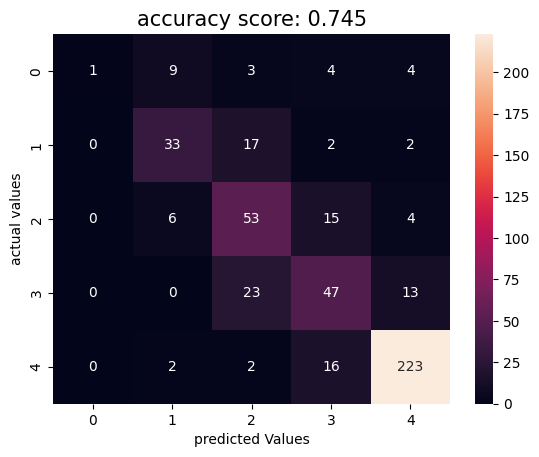

In [31]:
best_model.fit(x_train,y_train)
model_score = best_model.score(x_test,y_test)
y_pred = best_model.predict(x_test)

# plotting the confusion matrix
score = round(accuracy_score(y_test,y_pred),3)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('predicted Values')
plt.ylabel('actual values')
plt.title('accuracy score: {0}'.format(score),size=15)
plt.show()

**TUNING THE MODEL**

HYPERPARAMETER TUNING

In [33]:
# Define the model
model = SVC()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define grid
grid = {'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['rbf']
       }

# Define search
search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit search to training data
result = search.fit(x_train, y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.751517961023851
Best Hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


MODEL EVALUATION AGAIN

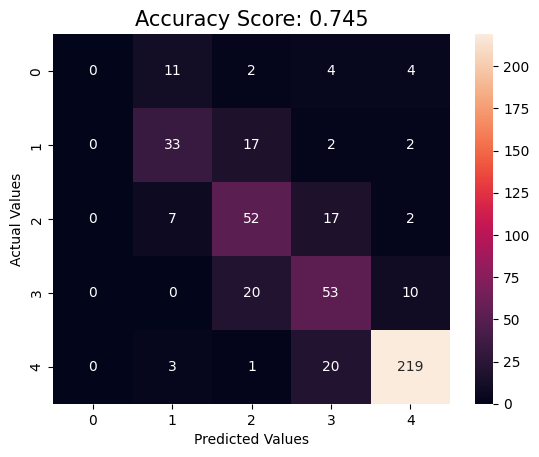

In [35]:
# Initialize and train model
score = result.score(x_test, y_test)
y_pred = result.predict(x_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

Reducing dimensionality

In [36]:
fimp.head(3)

Absences           0.469150
StudyTimeWeekly    0.191713
ParentalSupport    0.069698
dtype: float64

if we use only thse as predictors:

In [38]:
x_train = x_train[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]
x_test = x_test[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]

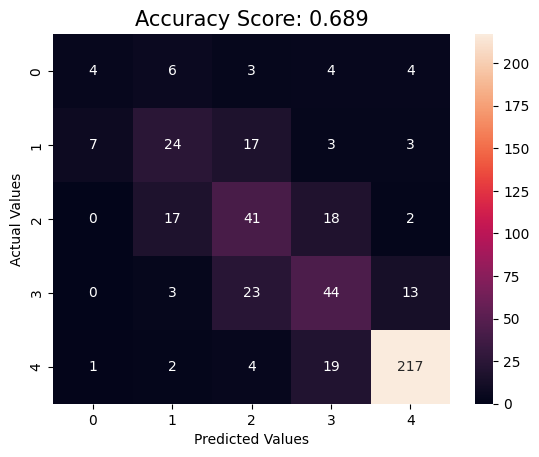

In [40]:
# Define Model
model = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)

# Fit search to new training data
result = model.fit(x_train, y_train)

# Initialize and train model
score = result.score(x_test, y_test)
y_pred = result.predict(x_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()


**CONCLUSION**

**Key Observations:**

**Model Performance:**

A Support Vector Machine (SVM) model predicts student grades with an accuracy of 74.5% on the test set using all available features.
When the dimensionality of the data is reduced to just three features, the model's accuracy drops to 68.9%.
Key Features for Success:

Absences: Regular attendance in class is crucial.
Study Time Weekly: Consistently studying the material taught in class enhances performance.
Parental Support: The involvement of parents in a student's academic endeavors significantly predicts success.
Trade-off:

Using all features in the dataset results in a more accurate model, but requires more computational resources.
Focusing on key features can simplify the model with a slight decrease in accuracy.
Important Insights for Students:

Attending classes regularly and studying consistently are within the control of students and are critical for achieving good grades.
Parental support, although beyond the control of students, plays a significant role in academic success.
By understanding and leveraging these key factors, students can improve their academic performance effectively.